<a href="https://colab.research.google.com/github/Toeysamm/2-64-NIDA-DADS5001/blob/main/04_Apply/Students_Alcohol_Consumption/Detailed_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detailed EDA and grade prediction using XGBoost
#####by EKARAT RATTAGAN · COPIED FROM RUSLAN SIKHAMOV +12,-1 · 2MO AGO · 196 VIEWS

#**อ. แนะนำอันนี้เพราะเป็นขั้นตอนการทำ EDA ที่โอเคมาก**

Student Alcohol Consumption. Detailed EDA and grade prediction.

The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students.

The goals of the present work are:
1. Estimate the factors affecting grade of students. (ปัจจัยไหนที่มีผลกับเกรดนศ.)
2. Estimate the level of alcohol consumption among students. (ระดับการดื่มแอลกอฮอล์มีผลยังไงไหม)
3. Build a machine learning model which is able to predict grade of students based on the available features.(อันนี้ไม่ได้สอนในวิชานี้ อ.ข้ามๆ)

The original dataset consists of two parts: students that study math and students that study the Portuguese language. In this notebook we will consider only the first part - students studying math.

Source - https://www.kaggle.com/uciml/student-alcohol-consumption

##First look at the data
First of all, let's import the libraries we will need.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
pd.options.display.max_columns=33

Then we can create a dataframe and have a look at it.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info() #ใช้ดู missing data และ จำนวน row และ columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe(include='all').T #describe() ใช้หาค่า statistic ต่างๆ || .T คือ Transpost

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


เค้าสรุปคร่าวๆให้ 3 ข้อ จากตารางด้านบน
1. The dataset includes information about 395 students.
2. There are 33 features. The majority of them are categorical variables. Some variables look numerical, but in fact, they are categorical(แค่บอกประเภท บางตัวแปรไม่สามารถเอาไปคำนวณได้). For example, Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education). There are only 5 real numerical features - age, absences, and grades (G1, G2, G3).
3. There are no missing values.

#EDA
First of all, we have to highlight the goals of our research:
1. Understand, which features affect the grades of students.
2. Assess the influence of alcohol consumption on the grades.

###General familiarization with the data (ทำความเข้าใจ data ก่อนเลย)
In this paragraph, I would like to have a look at the target (grades), at some basic features (age, sex, etc.) and at the level of alcohol consumption to get an understanding of the dataset we have. We will consider several features (which can affect the target and alcohol consumption based on my prejudiced opinion) and their influence on the target and alcohol consumption. A more precise investigation of all features will be done in the next paragraph.

###Distributions
In the dataset we have students from 2 different schools. Let's have a look, how many students they have.
(เริ่มดูที่ school 2 ที่ก่อน)

In [7]:
#.value_counts() คือนับจำนวนใน columns ที่สนใจว่าในแต่ละ catagory มีจำนวนเท่าไหร่
print(df['school'].value_counts())
#print(df['school'].value_counts().to_frame()) #.to_frame() ใช้เมื่อต้องการให้ output เป็น dataframe

GP    349
MS     46
Name: school, dtype: int64
    school
GP     349
MS      46


In [8]:
print(type(df['school'].value_counts()))
print(type(df['school'].value_counts().to_frame()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


###อยากรู้ว่ามีนศ.จาก GP และ MS กี่คนและคิดเป็นกี่ %

In [9]:
#concat = การ marge
# .to_frame() ถ้าไม่ทำอันนี้จะได้ type น่าตาเป็น series ถ้าทำอันนี้ได้ type น่าตาเป็น dataframe
# normalize=True  ทำให้ค่าที่ count ratio
# axis=1 ถ้า axis=0 จะไปต่อเป็น row แต่ถ้า axis=1 จะไปต่อเป็น column ตัวอย่าง axis=0 ข้างล่างนะ
pd.concat([df['school'].value_counts().to_frame(), df['school'].value_counts(normalize=True).to_frame()], axis=1)

,school,school
GP,349,0.883544
MS,46,0.116456


In [10]:
pd.concat([df['school'].value_counts().to_frame(), df['school'].value_counts(normalize=True).to_frame()])

,school
GP,349.000000
MS,46.000000
GP,0.883544
MS,0.116456


88% of students belong to Gabriel Pereira school, the rest belong to Mousinho da Silveira school.

Let's have a look at the age of students.

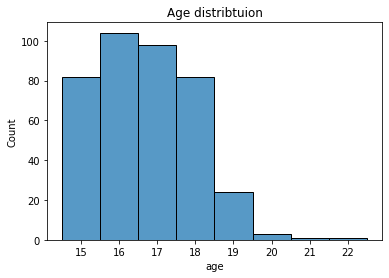

In [64]:
#อยากดู age โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df.age, bins=8, discrete=True) #bins=8 กำหนดให้มี 8 ถัง ใน histogram || discrete=True กำหนดความต่อเนื่องของค่าแต่ละถัง และค่า 15,16,... อยู่ตรงกลางแต่ละถัง
plt.title('Age distribtuion')
plt.show()

The age of majority of students is in the range between 15 and 18. The oldest students are 22 years old.

Another basic features is gender.

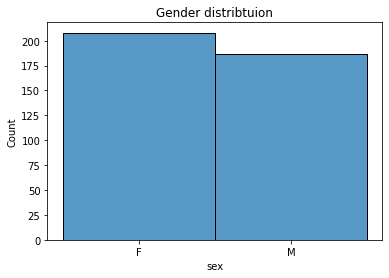

In [62]:
#อยากดู sex โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df.sex)
plt.title('Gender distribtuion')
plt.show()

In our dataset, there are a bit more females than males.

Now we will consider the feature Dalc. It shows a workday alcohol consumption (from 1 - very low to 5 - very high).

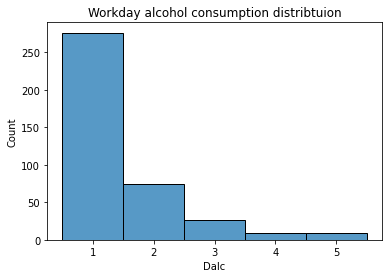

In [60]:
#อยากดู Dalc โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df.Dalc, discrete=True)
plt.title('Workday alcohol consumption distribtuion')
plt.show()

In [66]:
df['Dalc'].value_counts()
#อ่านว่า ที่ระดับ 1 มีจำนวน Dalc = 276

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [67]:
df['Dalc'].value_counts(normalize=True) #normalize=True output เป็น ratio
#อ่านว่า ที่ระดับ 1 มีจำนวน Dalc = 69.87%

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

In [69]:
#สามารถใช้ concat มาช่วยได้
pd.concat([df['Dalc'].value_counts().to_frame(), df['Dalc'].value_counts(normalize=True).to_frame()], axis=1)

,Dalc,Dalc
1,276,0.698734
2,75,0.189873
3,26,0.065823
5,9,0.022785
4,9,0.022785


From that we can conclude that the majority of students (almost 70%) do not drink alcohol during the week (1 in *Dalc* means very low consumption. It's weird that there is no choice of 0 meaning "no alcohol at all'. Since it's unrealistic to assume that every student drinks alcohol, in this notebook we will consider "very low consumption" as "no alcohol"). 19% drink a bit more than nothing, 2.5% drink a lot during the week.
จากข้อสรุปของเค้าบอกว่า ที่ระดับ 1 ของ Dalc มีถึง 70% อาจจะเป็นเพราะคนที่ไม่ดื่มเลยแต่ไม่มีระดับ 0 ให้เลือก จึงจำเป็นต้องเลือกระดับ 1 เลยอาจจะทำให้คนที่ไม่ดื่มเลย กลายเป็นต้องดื่มในระดับ 1
ดังนั้นเลยอาจจะปรับจากดื่มระดับ 1 เป็น ระดับ 1 หมายถึงคนที่ไม่ดื่มเลย ระดับ 2,3,4,5 เพิ่มขึ้นตามลำดับ

Another important feature is Walc - weekend alcohol consumption.

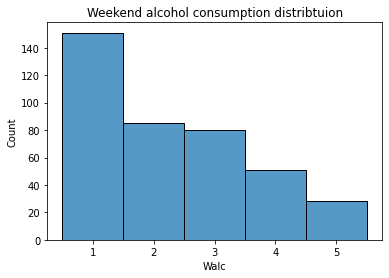

In [15]:
#อยากดู Walc โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [70]:
df['Walc'].value_counts()

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

In [16]:
df['Walc'].value_counts(normalize=True)
#อ่านว่า 38% ไม่ดื่มเลย, 21% ดื่มบ้าง, 20% ดื่มปานกลาง, 12% ดื่มสูง, 7% ดื่มสูงมาก

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

In [71]:
#สามารถใช้ concat มาช่วยได้
pd.concat([df['Walc'].value_counts().to_frame(), df['Walc'].value_counts(normalize=True).to_frame()], axis=1)

,Walc,Walc
1,151,0.382278
2,85,0.215190
3,80,0.202532
4,51,0.129114
5,28,0.070886


Here the situation changes completely. It seems like students start drinking on the weekend.

Also, it's interesting to see, **how many students, that do not drink alcohol during the week, drink alcohol on the weekend.**

**อยากจะหามีนร.กี่คนที่ไม่ดื่มในวันธรรมดาแต่มาดื่มในวันหยุด**

In [73]:
df[df['Dalc'] == 1]['Walc'].value_counts()

1    150
2     65
3     42
4     15
5      4
Name: Walc, dtype: int64

In [17]:
#step 1. เริ่มจากการ fliter ของคนที่ไม่ดื่มเลยในวันธรรมดา --> Dalc=1
#step 2. และเมื่อ fliter แล้วจะไปดูต่อที่ columns weeked --> Walc
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True) #ต้องการ output เป็น ratio

1    0.543478
2    0.235507
3    0.152174
4    0.054348
5    0.014493
Name: Walc, dtype: float64

More than 45%.
ดังนั้นมองว่า คนที่ไม่ดื่มเลยในวันธรรมดา มาดื่มใน weekend ถึง 54% (มากกว่า 45%)

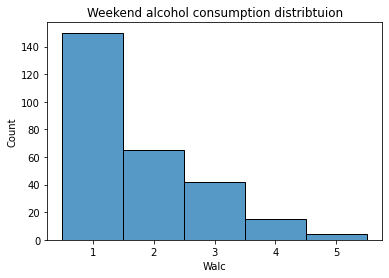

In [74]:
sns.histplot(df[df['Dalc'] == 1].Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

###Another interesting feature could be absences.

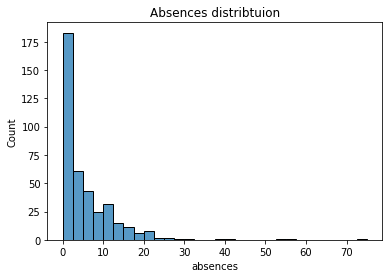

In [19]:
#อยากดู absences โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df['absences'], bins=30) #bins=30 เราสามารถกำหนดได้เลยว่าอยากได้ bins เท่าไหร่
plt.title('Absences distribtuion')
plt.show()

In [76]:
#.value_counts() นับจำนวนแต่ละถัง
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

In [77]:
pd.concat([df['absences'].value_counts().to_frame(),df['absences'].value_counts(normalize=True).to_frame()], axis=1)

,absences,absences
0,115,0.291139
2,65,0.164557
4,53,0.134177
6,31,0.078481
8,22,0.055696
10,17,0.043038
14,12,0.030380
12,12,0.030380
3,8,0.020253
16,7,0.017722


Most students either do not have a lot of absences or have 0 absences at all. But there are some unique students that have more than 30 absences.

Now, we can go to our target - grades.

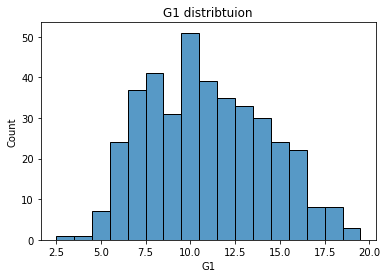

In [21]:
#อยากดู G1 โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df['G1'], discrete=True)
plt.title('G1 distribtuion')
plt.show()

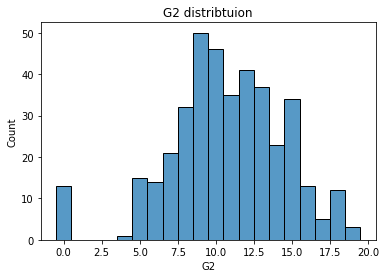

In [22]:
#อยากดู G2 โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df['G2'], discrete=True)
plt.title('G2 distribtuion')
plt.show()

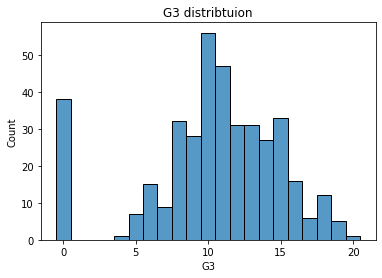

In [23]:
#อยากดู G3 โดยใช้กราฟในการดู --> กราฟมาจาก libery ชื่อ seaborn (import seaborn as sns)
sns.histplot(df['G3'], discrete=True)
plt.title('G3 distribtuion')
plt.show()

These three distribtuions look similar to normal distribution. G2 and G3 have outliers in 0. According to https://www.scholaro.com/pro/Countries/Portugal/Grading-System, the lowest possible grade in Portugal is 1. Let's have a look at the students that have 0 grade.

In [84]:
#อยากดู G3 = 0 มีกี่คน
df.query('G3 == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,home,father,1,2,3,no,yes,no,no,yes,yes,yes,no,3,3,2,1,1,3,0,6,7,0


We can separate these students into two groups:

1. Students of the first group have G2, but G3 is 0. It can be missing values, or by the time when the dataset was being created the student did not have a grade due to some circumstances.
2. Students of the second group have zero in G2, and in G3 as well. We can assume that these students left the school after the first period.

จะสังเหตุเห็นว่า มีคะแนน G1 หรือ G2 แต่ G3 เป็น 0 ดังนั้นอาจจะเกิดจากการที่ นร.ลาออกไปแล้ว

We can assume that students usually have approximately the same grade in the first and second periods, as well as final grade. Let's check this assumption.

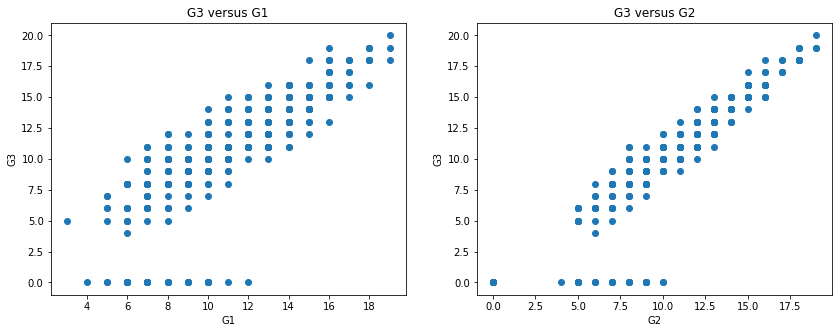

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14,5)) #subplots(1, 2, figsize=(14,5) กำหนด 1 แถว 2 columns สูง 14 ยาว 5
#G3 versus G1
axes[0].scatter(data=df, x='G1', y='G3')
axes[0].set_title('G3 versus G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
#G3 versus G2
axes[1].scatter(data=df, x='G2', y='G3')
axes[1].set_title('G3 versus G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

We can clearly see that points are scattered around the line y=x, which means that our assumption is correct.

For simplicity's sake in future reasoning, we will consider only G1, and obtained results can be applied to G2 and G3 as well.


**Alcohol consumption**

Let's have a closer look at alcohol consumption among students.

First of all, we will consider the effect of gender on alcohol comsuption.

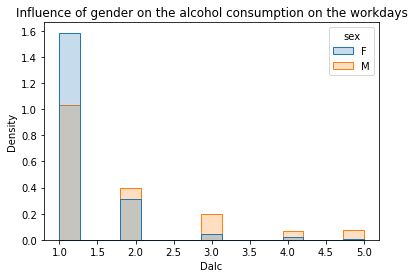

In [26]:
#พิจารณา sex ต่อการดื่มสุรา ของ Dalc
sns.histplot(data=df, x="Dalc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the workdays')
plt.show()

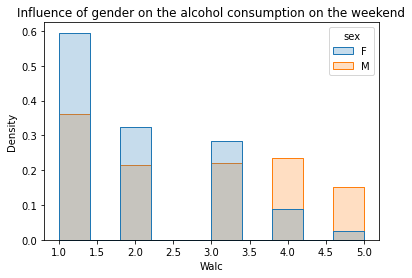

In [27]:
#พิจารณา sex ต่อการดื่มสุรา ของ Walc
sns.histplot(data=df, x="Walc", hue="sex", element="step",  stat="density")
plt.title('Influence of gender on the alcohol consumption on the weekend')
plt.show()

In [28]:
#ต้องการรู้ mean() ของ Dalc และ Walc โดยแยกตาม sex
df.groupby('sex')[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


We can clearly see that boys drink more than girls, which is to be expected. And both groups drink more on the weekend in comparison to the weekdays.


Now let's investigate the influence of age on alcohol consumption.

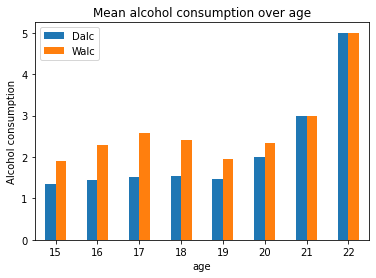

In [29]:
#ต้องการรู้ mean() ของ Dalc และ Walc โดยแยกตาม age และ plot เป็น bar (plot อยุ่ใน import matplotlib.pyplot as plt)
df.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0) # rotation=0 หมายถึง องศาของเลขกึ่งกลางของแต่ละ bar เช่นถ้าเป็นเลขเงินเดือนอาจจะต้องใช้ 45 จะได้เอียงๆไม่ชนกัน
plt.title('Mean alcohol consumption over age')
plt.show()

With an increase of age, alcohol consumption on the weekend also increases and reaches the peak at 17 years old, then it decreases a bit and again increases significantly at age of 20-22. But, as we remember from the previous section, we have only a few students older than 19, so this data is not representative for them.

We can summarize on one table mean alcohol consumption for every age and number of students of this age.

In [30]:
#[ต้องการรู้ mean และ count(นับจำนวน) --> ต้องใช้ agg มาช่วย] ของ Dalc และ Walc โดยแยกตาม age
df.groupby('age')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
         mean count      mean count
age                                
15   1.353659    82  1.902439    82
16   1.432692   104  2.278846   104
17   1.520408    98  2.571429    98
18   1.548780    82  2.414634    82
19   1.458333    24  1.958333    24
20   2.000000     3  2.333333     3
21   3.000000     1  3.000000     1
22   5.000000     1  5.000000     1

Other features that can affect alcohol consumptions are the type of place of living (urban or rural) and the parent's cohabitation status (living together or apart).

อยู่ในเมืองหรืออยู่ในชนบทมีผลต่อการดื่มหรือไม่

Let's start with the type of place of living. Let's build a table showing the mean values and number of students, and then build the distribtuions of alcohol consumption.

In [31]:
#[ต้องการรู้ mean และ count(นับจำนวน) --> ต้องใช้ agg มาช่วย] ของ Dalc และ Walc โดยแยกตาม address
df.groupby('address')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
address                                
R        1.636364    88  2.534091    88
U        1.436482   307  2.221498   307

In [94]:
for group, data in df.groupby('address'):
  print(group)
  print(data)

R
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
24      GP   F   15       R     GT3       T     2     4  services   health   
32      GP   M   15       R     GT3       T     4     3   teacher  at_home   
37      GP   M   16       R     GT3       A     4     4     other  teacher   
38      GP   F   15       R     GT3       T     3     4  services   health   
39      GP   F   15       R     GT3       T     2     2   at_home    other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...      ...   
385     MS   F   18       R     GT3       T     2     2   at_home    other   
386     MS   F   18       R     GT3       T     4     4   teacher  at_home   
387     MS   F   19       R     GT3       T     2     3  services    other   
392     MS   M   21       R     GT3       T     1     1     other    other   
393     MS   M   18       R     LE3       T     3     2  services    other   

         reason guardian  traveltime  studytime  failures sch

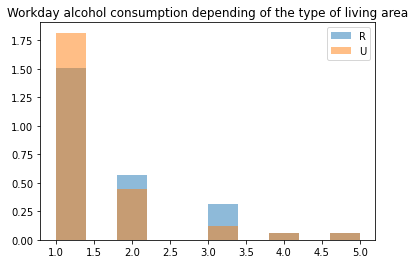

In [88]:
#df.groupby('address') ใน for เพื่อต้องการหา group และ data มาใช้งานต่อ เพื่อดู Dalc
for group, data in df.groupby('address'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the type of living area')
plt.show()

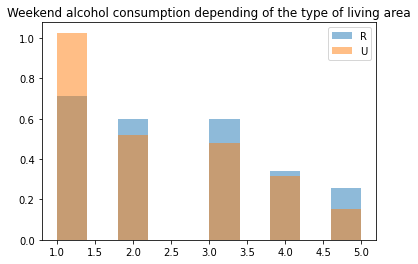

In [33]:
#df.groupby('address') ใน for เพื่อต้องการหา group และ data มาใช้งานต่อ เพื่อดู Walc
for group, data in df.groupby('address'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the type of living area')
plt.show()

It seems like students which live in rural area consume more alcohol, but the number of these students are not so high. To be sure we can carry out the statisctical test.

ต้องการทดสอบว่า mean ที่ได้มาจาก R > mean ที่ได้มาจาก U จริงๆหรือเปล่า???


###Build two samples.

In [34]:
sample_R = df.query('address == "R"')['Walc']
sample_U = df.query('address == "U"')['Walc']

Set the significance level - 0.05.

We will use t-test.

In [35]:
st.ttest_ind(sample_R, sample_U).pvalue #st. คือ from scipy import stats as st

0.04457793151864655

P-value is lower than the significance level. It means that the probability to take these samples randomly is low (with a condition that there is no difference in alcohol consumption), and we can conclude that the difference is significant. Students living in rural area drink more alcohol that students living in urban area.

Ho : mean R <= mean U

H1 : mean R > mean U

so p-value = 0.045 < the significance level = 0.05 reject Ho

so mean R > mean U

ดังนั้นจะเห็นได้ว่าเป็นไปตามที่คิดจริงๆ

Now we can consider the parent's cohabitation status.

As in the previous case, we will check the mean values, number of students in each group and then build the distributions.

In [36]:
#[ต้องการรู้ mean และ count(นับจำนวน) --> ต้องใช้ agg มาช่วย] ของ Dalc และ Walc โดยแยกตาม Pstatus
df.groupby('Pstatus')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
Pstatus                                
A        1.560976    41  2.268293    41
T        1.471751   354  2.293785   354

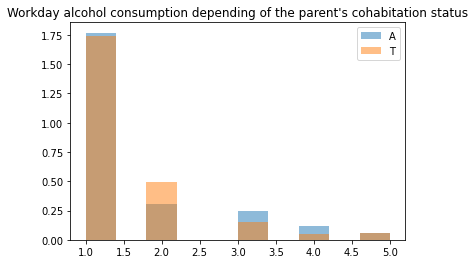

In [37]:
#df.groupby('Pstatus') ใน for เพื่อต้องการหา group และ data มาใช้งานต่อ เพื่อดู Dalc
for group, data in df.groupby('Pstatus'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

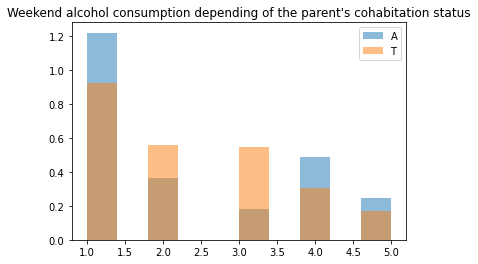

In [38]:
#df.groupby('Pstatus') ใน for เพื่อต้องการหา group และ data มาใช้งานต่อ เพื่อดู Walc
for group, data in df.groupby('Pstatus'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

Students, which parents live apart, drink a bit more on the weekdays and a bit less on the weekend in comparison with those, which parents live together. Taking into account the small sample of students, which parents live apart, we can not say that the difference is significant. So, the parent\'s cohabitation status does not affect students alcohol consumption.

**Features affecting the grade**

As we said in section 2.1.1, we will consider only G1.

In this section we will consider how the features discussed above affect the target (G1).

Let's start with age. Does age affect the grade at school? Do students get better marks as they get older or in the opposite? We will take into account only students younger than 20 because we have enough data of them.

First of all, we will check the distribution of grades for every age.

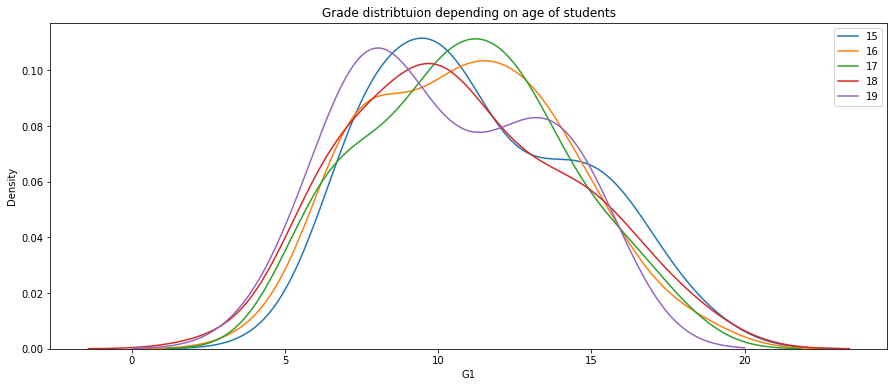

In [39]:
plt.figure(figsize=(15,6))
for age, grouped_data in df.groupby('age'):
    if age <= 19:
        sns.kdeplot(grouped_data['G1'], label=age)
plt.legend()
plt.title('Grade distribtuion depending on age of students')
plt.show()

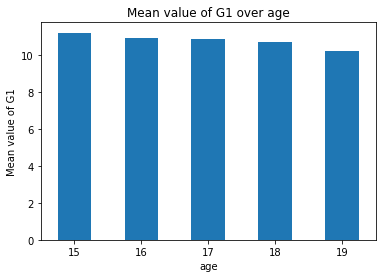

In [40]:
df.query('age <= 19').groupby('age')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over age')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

The distribution of G1 over ages do not differ too much. The mean value is slightly decreasing. Let's check, whether the difference between ages is significant or not by applying the statistical test.

We will use t-test with a significance level of 0.05

In [41]:
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 19')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 18')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 17')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('age == 15')['G1'], df.query('age == 16')['G1'], equal_var=False).pvalue)

0.19327505866818148
0.3430850642066231
0.49815301469480133
0.5528168347429009


The difference is insignificant, so we can conclude that age does not affect the grade.

Now we can move on to gender.

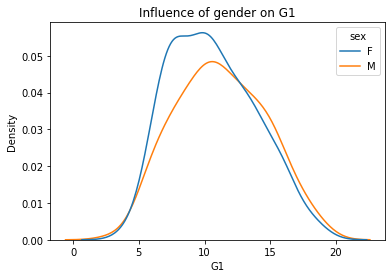

In [42]:
sns.kdeplot(data=df, x="G1", hue="sex")
plt.title('Influence of gender on G1')
plt.show()

In [43]:
df.groupby('sex')[['G1']].mean()

,G1
sex,
F,10.620192
M,11.229947


The distributions are slightly different and the mean value for males is higher than for females. The difference is not big enough to be confident, so we will again apply the statistical test, namely t-test with a significance level of 0.05.

In [44]:
st.ttest_ind(df.query('sex == "M"')['G1'], df.query('sex == "F"')['G1'], equal_var=False).pvalue

0.06898106402330258

The p-value is higher than the significance level, so we do not have enough reasons to reject the null hypothesis. Based on this, we can conclude that mean G1 for males and females are the same. And we can say that gender does not affect the grade.

Now it's time to consider the influence of alcohol consumption on the grade.

As in the previous cases, we will build distributions and then compare the mean values.

Let's start with workday alcohol consumption.

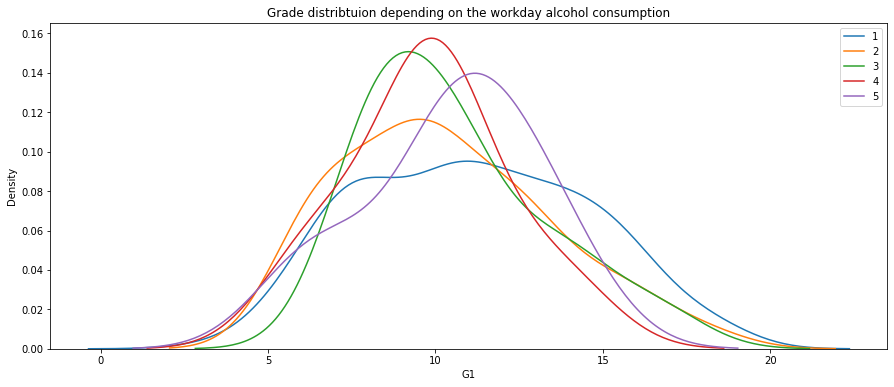

In [45]:
plt.figure(figsize=(15,6))
for dalc, grouped_data in df.groupby('Dalc'):
    sns.kdeplot(grouped_data['G1'], label=dalc)
plt.legend()
plt.title('Grade distribtuion depending on the workday alcohol consumption')
plt.show()

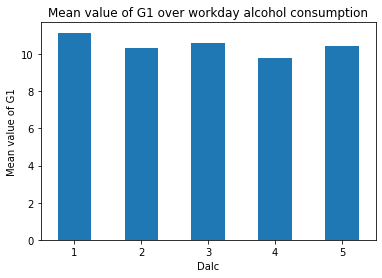

In [46]:
df.groupby('Dalc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over workday alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Distributions are different. For students that consume a low amount of alcohol on workdays (or no alcohol at all), there is a wide peak, but for students that consume more alcohol, this peak is narrower. The mean values are slightly different, and students with the lowest alcohol consumption have the highest mean grade, but the groups have different sizes and our sample is relatively small, so we can not be sure. Let's turn again to the t-test with a significance level of 0.05.

In [47]:
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 2')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Dalc == 1')['G1'], df.query('Dalc == 5')['G1'], equal_var=False).pvalue)

0.04323868914586449
0.3117327064366279
0.1275605526483468
0.446010208160306


Also it's useful to have a look at a sample size.

In [48]:
df.groupby('Dalc')['Dalc'].count().to_frame()

,Dalc
Dalc,
1,276
2,75
3,26
4,9
5,9


The difference between the first and second groups is significant. Other differences are not significant, but it can be caused by the small size of the groups with higher alcohol consumption.

So, I tend to assume that workday alcohol consumption affects grade, and the lower alcohol consumption - the better grade.

Now we will do the same procedure but for alcohol consumption on the weekend.

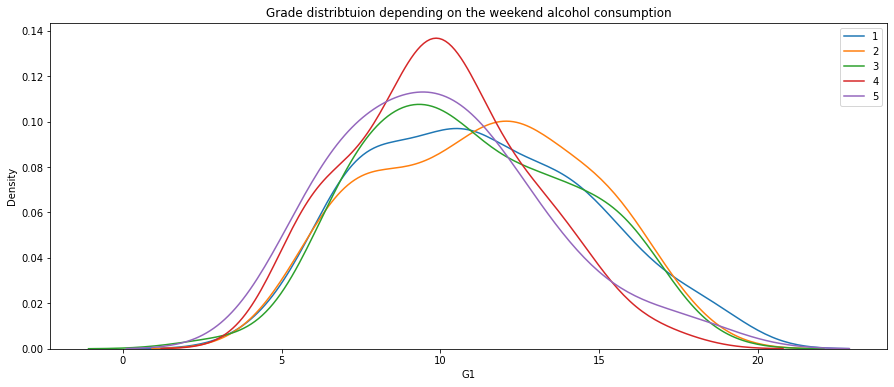

In [49]:
plt.figure(figsize=(15,6))
for walc, grouped_data in df.groupby('Walc'):
    sns.kdeplot(grouped_data['G1'], label=walc)
plt.legend()
plt.title('Grade distribtuion depending on the weekend alcohol consumption')
plt.show()

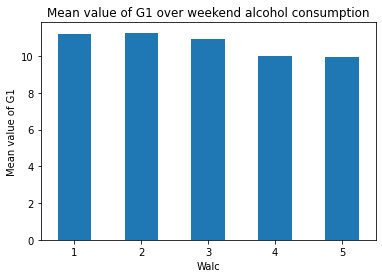

In [50]:
df.groupby('Walc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over weekend alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

Here we have a similar situation to that we had with workday alcohol consumption. Again we need to apply the t-test. Now group 2 has the highest mean value, so it'll be compared with other groups.

In [51]:
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 1')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 3')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 4')['G1'], equal_var=False).pvalue)
print(st.ttest_ind(df.query('Walc == 2')['G1'], df.query('Walc == 5')['G1'], equal_var=False).pvalue)

0.8413238345026541
0.516145067869843
0.0161625232653966
0.06736401492389404


In [52]:
df.groupby('Walc')['Walc'].count().to_frame()

,Walc
Walc,
1,151
2,85
3,80
4,51
5,28


In spite of p-value in the last case being slightly higher than our significance level, I would say that the high alcohol consumption on the weekend leads to low grade at school. Students with low and medium alcohol consumption on the weekend have the same grade.

**Conclusions**

In this paragraph, several features and their influence on the grade were briefly investigated. The conclusions are following:

1. The age of the majority of students in the dataset is in the range between 15 and 18. The oldest student is 22 years old.
2. The majority of students (almost 70%) do not drink alcohol during the workdays, 19% drink a bit more than nothing, 2.5% drink a lot during the workdays.
3. The situation with alcohol consumption changes on the weekend. Only 38% of students do not drink, 22% drink a bit, 20% have medium consumption, 13% - higher than medium, 7% - the highest consumption.
4. The grades have distributions similar to the normal distribution. There is a strong linear correlation between grade in the first period, grade in the second period, and final grade.
5. Male students consume more alcohol than female students.
6. With an increase in age, alcohol consumption on the weekend also increases and reaches its peak at 17 years old.
7. Students living in rural areas drink more alcohol than students living in urban areas.
8. Age and gender do not affect grade.
9. Alcohol consumption affects grade. Students, that have high alcohol consumption, have lower grade.

#--- Week5 end here ---